# Introduction

We are curious what fraction of a library is filled with spikes?

In [1]:
import os
from glob import glob
import sys
import pandas

In [2]:
%matplotlib inline

In [3]:
ROOT=os.path.expanduser("~diane/proj/encode3-curation")
if ROOT not in sys.path:
    sys.path.append(ROOT)

In [4]:
experiment_qc = pandas.read_csv(os.path.join(ROOT, 'compare-mad', 'experiment-mad-qc.csv'))

In [5]:
wold = glob(os.path.expanduser('~/public_html/compare-mad/wold_gene_quantifications/*_tpms.csv'))
len(wold)

95

In [6]:
gingeras = glob(os.path.expanduser('~/public_html/compare-mad/gingeras_fpkms/*_tpms.csv'))
len(gingeras)

142

In [7]:
def read_experiment_quantifications(experiments):
    for pathname in experiments:
        path, filename = os.path.split(pathname)
        accession = filename.split('_')[0]
        data = pandas.read_csv(pathname, index_col=0, header=0)
        trna_rows = [ x[0].isdigit() for x in data.index ]
        gencode_rows = [ x.startswith('ENS') for x in data.index]
        spike_rows = [ x.startswith('gSpikein') for x in data.index]
        trna_sum = data[trna_rows].sum()
        gencode_sum = data[gencode_rows].sum()
        spike_sum = data[spike_rows].sum()
        total_sum = data.sum()
        fraction_spikes = spike_sum / total_sum
        for name in fraction_spikes.index:
            yield (accession, name, fraction_spikes[name])

In [8]:
gingeras_sums = pandas.DataFrame(read_experiment_quantifications(gingeras), columns=['experiment', 'library', 'fraction'])
gingeras_sums.to_csv(os.path.expanduser('~/public_html/compare-mad/gingeras_fpkms/gingeras-fraction-spikes.csv'),
                 index=False)

# Gingeras Fraction Spikes

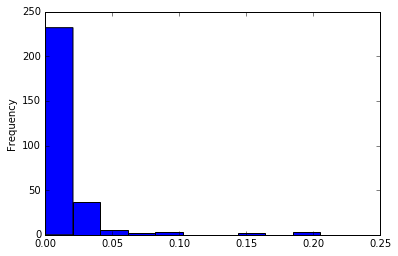

In [9]:
gingeras_sums.fraction.plot(kind='hist')

There's so few Gingeras spikes > 0.05. We can look at all the values

In [10]:
gingeras_sums[gingeras_sums.fraction > 0.05]

,experiment,library,fraction
44,ENCSR000CPW,ENCLB555AQS,0.200605
45,ENCSR000CPW,ENCLB555AQR,0.205193
66,ENCSR000CPV,ENCLB555ATG,0.195303
67,ENCSR000CPV,ENCLB555ATF,0.154312
110,ENCSR292TAP,ENCLB476DSJ,0.059833
148,ENCSR067UNX,ENCLB861ZBV,0.088123
152,ENCSR000AAN,ENCLB026ZZZ,0.054312
218,ENCSR201WVA,ENCLB899IDA,0.161874
219,ENCSR201WVA,ENCLB504WFG,0.086756
222,ENCSR255NYQ,ENCLB714MUL,0.054840


In [11]:
wold_sums = pandas.DataFrame(read_experiment_quantifications(wold), columns=['experiment', 'library', 'fraction'])
wold_sums.to_csv(os.path.expanduser('~/public_html/compare-mad/wold_gene_quantifications/wold-fraction-spikes.csv'),
                 index=False)

# Wold Fraction Spikes

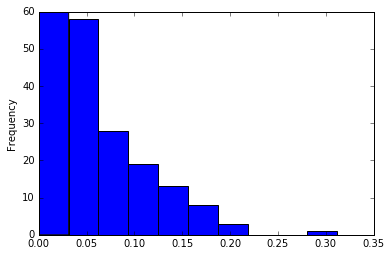

In [12]:
wold_sums.fraction.plot(kind='hist')

In [13]:
wold_spearman_fraction = pandas.merge(
    experiment_qc[['experiment', 'Spearman']], 
    wold_sums[['experiment', 'fraction']],
    on='experiment', how='inner')

# Wold Spearman vs fraction spikes

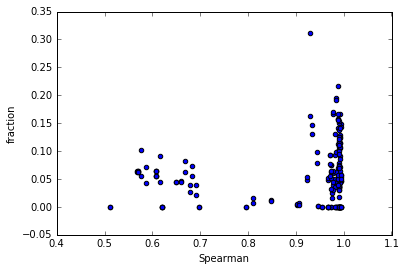

In [14]:
wold_spearman_fraction[['Spearman', 'fraction']].plot('Spearman', 'fraction', kind='scatter')

# Wold MAD vs fraction spikes

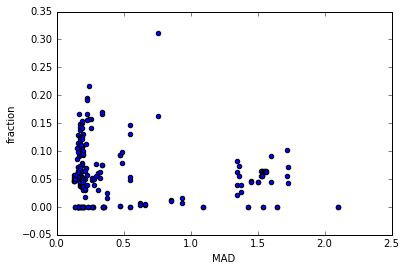

In [15]:
wold_spearman_fraction = pandas.merge(
    experiment_qc[['experiment', 'MAD']], 
    wold_sums[['experiment', 'fraction']],
    on='experiment', how='inner').plot('MAD', 'fraction', kind='scatter')

In [16]:
wold_fraction = pandas.merge(
    experiment_qc[['experiment', 'description', 'Spearman']], 
    wold_sums[['experiment', 'library', 'fraction']],
    on='experiment', how='inner')

# High wold spikes

Lets look at the high value spikes what experiments do we see....

In [17]:
wold_fraction[wold_fraction['fraction'] > 0.10][['experiment', 'description', 'Spearman', 'library', 'fraction']]

,experiment,description,Spearman,library,fraction
0,ENCSR000AEQ,RNA Evaluation K562 Long Poly-A+ RNA-seq from ...,0.988551,ENCLB063ZZZ,0.157561
1,ENCSR000AEQ,RNA Evaluation K562 Long Poly-A+ RNA-seq from ...,0.988551,ENCLB064ZZZ,0.140954
2,ENCSR000AEP,RNA Evaluation K562 Long Total RNA-seq from Wold,0.977907,ENCLB061ZZZ,0.166682
3,ENCSR000AEP,RNA Evaluation K562 Long Total RNA-seq from Wold,0.977907,ENCLB062ZZZ,0.169722
8,ENCSR541XZK,RNA-seq on embryonic 11.5 day mouse limb,0.993167,ENCLB495FUZ,0.114488
9,ENCSR541XZK,RNA-seq on embryonic 11.5 day mouse limb,0.993167,ENCLB979DZW,0.166698
14,ENCSR236EGS,RNA-seq on a dissected area of layer V from an...,0.933584,ENCLB229LFR,0.130001
15,ENCSR236EGS,RNA-seq on a dissected area of layer V from an...,0.933584,ENCLB700NFV,0.147065
24,ENCSR760TOE,RNA-seq on embryonic 11.5 day mouse hindbrain,0.988234,ENCLB454ZUS,0.157228
25,ENCSR760TOE,RNA-seq on embryonic 11.5 day mouse hindbrain,0.988234,ENCLB061TDP,0.216588


# Spikes Missing

These have a very low fraction of spikes. sufficiently small I'm not sure the spikes are actually present.

In [19]:
wold_fraction[wold_fraction['fraction'] < 0.001][['experiment', 'description', 'Spearman', 'library', 'fraction']]

,experiment,description,Spearman,library,fraction
6,ENCSR415JJO,RNA-seq on excised cerebellar granule cells fr...,0.621200,ENCLB386HBI,1.974000e-05
7,ENCSR415JJO,RNA-seq on excised cerebellar granule cells fr...,0.621200,ENCLB976CMA,5.730002e-06
16,ENCSR946HWC,Total RNA-Seq on postnatal 0 day mouse skeleta...,0.974295,ENCLB847UDV,1.982000e-05
17,ENCSR946HWC,Total RNA-Seq on postnatal 0 day mouse skeleta...,0.974295,ENCLB704CYQ,2.143001e-05
20,ENCSR000AJD,RNA-seq of GM12878 bulk prep of 10 ngs,0.619968,ENCLB036MBQ,0.000000e+00
21,ENCSR000AJD,RNA-seq of GM12878 bulk prep of 10 ngs,0.619968,ENCLB284CYK,0.000000e+00
30,ENCSR331XCE,Total RNA-Seq on postnatal 0 day mouse intestine,0.991839,ENCLB217DSV,2.155001e-05
31,ENCSR331XCE,Total RNA-Seq on postnatal 0 day mouse intestine,0.991839,ENCLB159SLV,1.020001e-05
34,ENCSR000AJG,RNA-seq of a GM12878 10-11 cell pool,0.511464,ENCLB550GYC,0.000000e+00
35,ENCSR000AJG,RNA-seq of a GM12878 10-11 cell pool,0.511464,ENCLB576ZGP,0.000000e+00
